# Bayesian Flow Networks: Visualising Flows

## Imports

In [4]:
import jax.numpy as jnp
import jax.random as jr
import jax

from tqdm import tqdm
import matplotlib.pyplot as plt
import mpltern

In [5]:
import bfn.train_and_sample as tas
import bfn.example_data as example_data
import bfn.training as training
import bfn.models as models
import bfn.utils as utils
import bfn.visualising_flows as viz_flows

## Main

### Calculating $p_F(\boldsymbol{\theta} | \mathbf{x}; t)$ and Generating Stochastic $\boldsymbol{\theta}_i \leftarrow h(\boldsymbol{\theta}_{i-1}, \mathbf{y}, \alpha)$

The mixing of these dynamics seems to be quite slow, possibly because there is no relationship between the categorical variables.
I still need to check if the flow distribution matches the empirical marginals of the stochastic paths.

In [1]:
# View source code of flow function
utils.display_source(viz_flows.flow)

NameError: name 'utils' is not defined

In [6]:
beta = 2.0
T = 0.4
h, edges = viz_flows.flow(jnp.array([1]), 3, T, beta, 10000000, key=jr.PRNGKey(0))

In [10]:
# View source code of sampling function
utils.display_source(viz_flows.sample_theta)

In [7]:
theta_timeline = viz_flows.sample_theta(jnp.array([1]), 3, beta, 5000, key=jr.PRNGKey(4))

In [8]:
theta_timeline.shape

(5000, 3, 1)

### Plot Trajectories and Heatmap

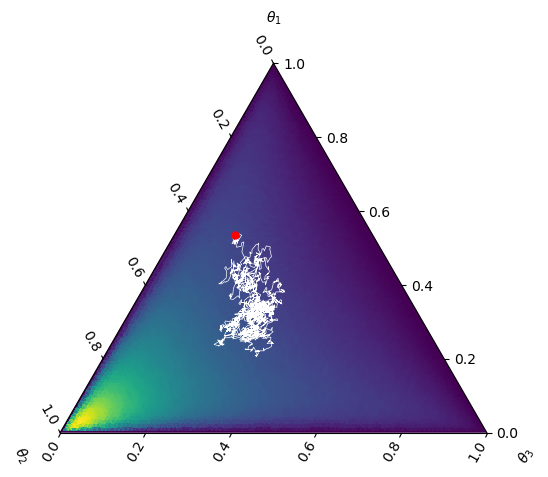

In [7]:
ax = plt.subplot(projection="ternary")
t, l, r, v = viz_flows.make_ternary_vals(h, edges)

ax.tripcolor(t, l, r, jnp.log1p(v), shading="flat", edgecolors="none", vmin=0)
ax.set_facecolor(plt.cm.viridis(0))  # TODO Force consistent colormap usage

fraction = int(theta_timeline.shape[0] * T)
t_theta, l_theta, r_theta = theta_timeline[:fraction, 0, 0], theta_timeline[:fraction, 1, 0], theta_timeline[:fraction, 2, 0]
ax.plot(t_theta, l_theta, r_theta, color="w", linewidth=0.5)

# plot point at the end
ax.plot(t_theta[-1], l_theta[-1], r_theta[-1], color="r", marker="o", markersize=5)

_ = ax.set_tlabel(r"$\theta_1$")
_ = ax.set_llabel(r"$\theta_2$")
_ = ax.set_rlabel(r"$\theta_3$")